<a href="https://colab.research.google.com/github/shoaibswe/data_analysis_project_I/blob/main/Data_Analysis_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
##adding training dataset
##td =pd.read_excel('G:\GDrive\DATA ANALYSIS PRACTICE\Data_Train.xlsx')

##reading from google drive

#from google.colab import drive
drive.mount('/content/drive')
url=('/content/drive/MyDrive/DAP/Data_Train.xlsx')
##reading from local
# from google.colab import files
# uploaded_file = files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
td=pd.read_excel(url, sheet_name=0, header=0)

In [64]:
td.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#To see all missing value count
td.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# New Section

# New Section

In [65]:
#dropping missing values as so much less and wont impact that much
td.dropna(inplace=True)

In [ ]:
#check now
td.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#view data types , to check if any changes need and understand the data
td.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Date_of_Journey, 
#### Dep_Time,
#### *Arrival_Time need to convert to time format, need to change it*


In [68]:
#creating function for changin data type of column to date
def _to_datetime(col_x):
    td[col_x]=pd.to_datetime(td[col_x])

In [69]:
#calling func for chaning some columns in a loop
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
        _to_datetime(i)

In [73]:
td

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-02-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-26 05:50:00,2021-02-26 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-02-26 18:05:00,2021-02-26 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-02-26 16:50:00,2021-02-26 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-02-26 19:55:00,2021-02-26 22:25:00,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-02-26 20:45:00,2021-02-26 23:20:00,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-02-26 08:20:00,2021-02-26 11:20:00,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-02-26 11:30:00,2021-02-26 14:10:00,2h 40m,non-stop,No info,12648,2019,1,3


In [84]:
#date of journey is date type, now changing to date and time saperately in new columns
td['journey_year']=td['Date_of_Journey'].dt.year
td['journey_month']=td['Date_of_Journey'].dt.month
td['journey_day']=td['Date_of_Journey'].dt.day

In [ ]:
td.head(3)

In [86]:
def _get_hour(data_frame_name,col_name):
    td[col_name+'_hour']=td[col_name].dt.hour

def _get_min(data_frame_name,col_name):
    td[col_name+'_minute']=td[col_name].dt.minute            

def _drop_col(data_frame_name,col_name):
    td.drop(col_name,axis=1,inplace=True)

In [88]:
_get_hour(td,'Dep_Time')
_get_min(td,'Dep_Time')
#_drop_col(td,'Dept_Time')

KeyError: ignored

In [81]:
##DUE to this error, I have convert this column into date time

In [82]:
_get_hour(td,'Dep_Time')
_get_min(td,'Dep_Time')
_drop_col(td,'Dep_Time')

KeyError: ignored

In [89]:
#wow! now this works!
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-26 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50


In [90]:
#lets dos teh same for Arrival_Time
_get_hour(td,'Arrival_Time')
_get_min(td,'Arrival_Time')
_drop_col(td,'Arrival_Time')

In [91]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [92]:
#We can split Hour and time td.head(2)
'2h 20min'.split(' ')

['2h', '20min']

In [93]:
#Lets split the duration
duration = list(td['Duration'])
for i in range(len('Duration')):
    if len(Duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i]+ '0m'
        else:
                duration[i]= '0h'+duration[i]

NameError: ignored

In [ ]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10


In [94]:
#Lets split the duration
duration=list(td['Duration'])

##list was smaller d :P perviously I mistakenly use D. Now works!

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [95]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [96]:
td['Duration']=duration

In [97]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [98]:
'6h 2m'.split(' ')[1]

'2m'

In [99]:
'6h 2m'.split(' ')[0:-1]

['6h']

In [100]:
'14h 20m'.split(' ')[1][0:-1]
#getting time only

'20'

In [101]:
'14h 20m'.split(' ')[0][0:-1]
##getting hour only

'14'

In [102]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [103]:
def minute(x):
    return x.split(' ')[1][0:-1]

In [104]:
td['duration_hr']=td['Duration'].apply(hour)

td['duration_min']=td['Duration'].apply(minute)

In [105]:
td.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
journey_year                    int64
journey_month                   int64
journey_day                     int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
duration_hr                    object
duration_min                   object
dtype: object

In [106]:
_drop_col(td,'Duration')

In [107]:
td['duration_hr']=td['duration_hr'].astype(int)
td['duration_min']=td['duration_min'].astype(int)

In [108]:
td.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Total_Stops                    object
Additional_Info                object
Price                           int64
journey_year                    int64
journey_month                   int64
journey_day                     int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
duration_hr                     int64
duration_min                    int64
dtype: object

In [109]:
categorical_cols=[i for i in td.columns if td[i].dtype=='O']
categorical_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [110]:
continiuous_cols=[i for i in td.columns if td[i].dtype!='O']
continiuous_cols

['Date_of_Journey',
 'Price',
 'journey_year',
 'journey_month',
 'journey_day',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'duration_hr',
 'duration_min']

In [111]:
#viewing value counts of  features of the column
td['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

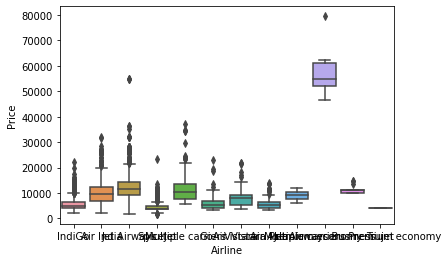

In [112]:
# distribution of Airline and Price in boxplot
sns.boxplot(x='Airline',y='Price',data=td)

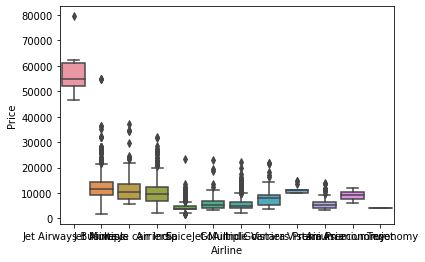

In [113]:
# sorting against price in descending order
sns.boxplot(x='Airline',y='Price',data=td.sort_values('Price',ascending=False))

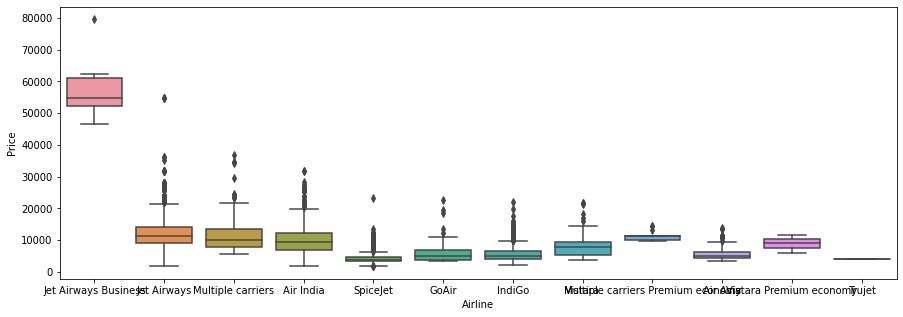

In [114]:
#figure sizing
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=td.sort_values('Price',ascending=False))